# Introduction to Neural Networks and Deep Learning

# Chapter 10: Graph Neural Networks 

## Prof. Aldo Humberto Romero, Physics Department, West Virginia University

## A lot of these notebooks are based on the course prepared at West Virginia University by the research computing group led by Aldo Humberto Romero by mostly done by Guillermo Avendaño-Franco.

# Introduction to graph neural networks with applications in molecular science

This notebook will serve as an introduction to Graph Neural Networks, starting for the basics of graphs to an aplication of Graph Neural Networks in molecular science.

As a prerequisite, I would suggest to be familiar with Python and have some knowledge on Neural Networks, Machine Learning, optimization, some signal processing and probability/statistics.

The tutorial is structured as follows:

- Chapter 1: Graph Data, why it is so useful and how to encode them in Python

- Chapter 2: Conceptual Recap of Neural Networks with example in Python using PyTorch

- Chapter 3: Graph Neural Networks: Theory,Concepts and Application in molecular science


For this tutorial, the libraries PyTorch and PyTorch-geometric will be used.

## Chapter 1: Graph Data, why it is so useful and how it is encoded in Python

Graph data can be found everywhere. In social networks, communication systems, text data, molecules or even images can be represented as graph data.

Before I showcase some examples of graph data, let's define a graph more precisely:

A graph $G$ consist of vertices (or nodes) $v_i$, which make up the vertex set $V$, and the edges $e_j$, which make up the edge set $E$.

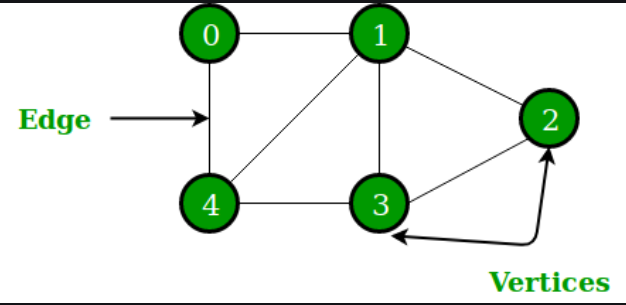

Both vetrices can have assigned features, which in our case we can call $x_v$ and $x_e$, generally encoded as vectors. These will be informations that define the graph. For instance, in molecules, this could be physical quantities that describe the atom, such as mass, charge, etc. The same goes for the edge features, which in the case of molecules would describe the properties of the bonds between the molecules constituant atoms, such as bond length, maybe bond angle.

These informations are however stored in a higher level form for the whole molecule, or hence the molecular graph.

This form is give by a feature vector/matrix $X_{feat.}$ (containing the features of the individual vertices of the graph), an adjacency matrix $X_{adj.}$ (containing information on which vertices are connected to one another).

here would be an example of a molecule, its adjacency matrix and its graph representation:
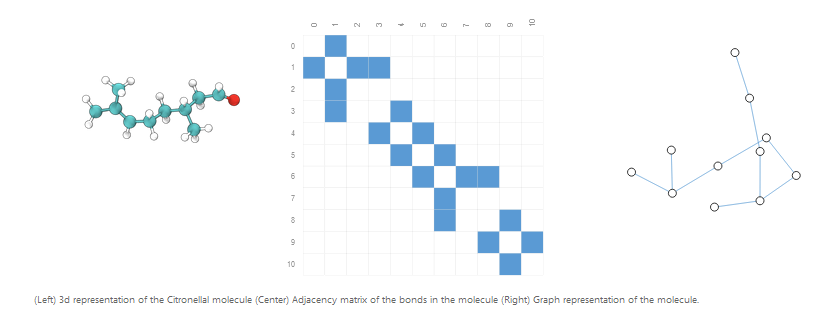


Using this compact representation in forms of feature- and adjacency matrices, it is a fairly easy data structure to be handled in programming languages such as Python.

As library, we use **PyTorch Geometric** to handle the graph data. In this library, here numerous sample datasets to be explored, such as *Planetoid* (citation network), *Amazon* (Amazon computers and Amazon Photo networks), as well as the **QM9** dataset, a dataset consisting of molecular graphs.

## Chapter 2: Conceptual Recap of Neural Networks

Artificial Neural Networks is a particular technique of Machine Learning which is based upon the percptreon algorithm ( invented by Mulloch and Pitts in 1943, implemented by Rosenblatt), and has been flourishing in use due to advacements in technology and vast increase in available computing power.

Nowadays, there exist an array of different models, impossible to cover in a tutorial of this scope. Due to that, I will mention only the types of models that are important for the applications in molecular science that we will build up to.



These will be:

- MLP

- CNN

- Auto-Encoder

In this section I will provide some examples of NN, using the library PyTorch.

#### Perceptron an Multi-Layer-Perceptron:


Before getting started with the implemntation, lets go over how neural networks (NN) are constructed and why they are so useful.

As in classical machine learning (linear regression, logistic regression, decision trees,..), we are always working with a input matrix/vector $X$ and some classification/regression target $Y$.

Now the particularity is the follwoing architecture:
 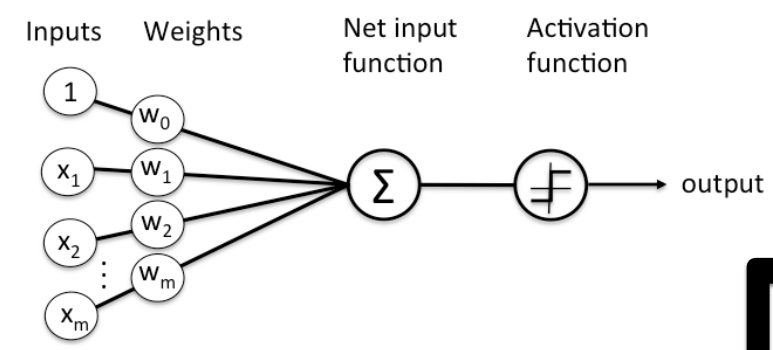

As in a network, we have vertices and edges. The difference here is that we have our inputs $X$ and a weight vector $w$ which get accumulated in our net input function of the form:

$\sum_i X_i \cdot w_i + b $

where $b$ is called *bias*. This input function is then passed as argument to an *activation function* (let's call it $\sigma(x)$).

Depending on the value of the input function, our *activation function* $\sigma(x)$ will either return $1$ or $0$ depending on the value of our input function.

Formally defined we have:

$\sigma(\sum_i X_i \cdot w_i + b) = 0 , \, if \quad \sum_{i} w_i x_i + b \leq 0  $

or

$\sigma(\sum_i X_i \cdot w_i + b) = 1 , \, if \quad \sum_{i} w_i x_i +b > 0 $

If there is a discrepancy between a produced output $\hat{y}$ and a desired output $y$, the weights $w_i$ will be updated in the inital computation of our input function.

The total algorithm goes as follows:

STEP 1: Initialisation:

- randomise weights to non-zero small numbers

STEP 2: Training the perceptron:


- until outputs are correct:
- for all inputs, compute activation of neuron:

$\sigma(\sum_i X_i \cdot w_i + b)$


- update weights with a given learning rate $\eta$: $w_i$ <- $w_i$ - $\eta$ $\cdot$ ($y$- $\hat{y}$)$x_i$

This is the aforementioned *perceptron* algorithm. This unit can however be used in a bigger structure called a *Multi-Layer-Perceptron*. While the single perceptron has its obvious limitations,they become really powerful for prediction or classification in a larger network structure.

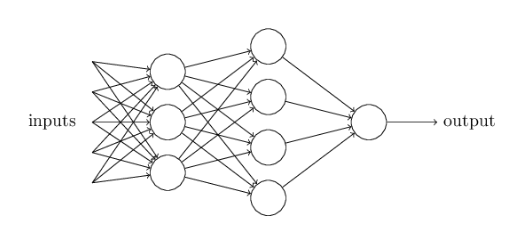

This would be an example for an MLP (Multi Layer Perceptron) for a regression task, as we have one singular outcome node.



As one can see, there are multiple neurons that form a network, allowing for more weights to be adjusted, and more functions to be learned between different input and outputs. From the mathematical theory of neural networks, there exists a theorem called "Universal Approximation Theorem", which states that for arbitrary width and bounded depth of the network, any function $f$ can be approximated by the neural network.

But to "learn" the right weights in the MLP case, there are more tools to be used to generate a well functioning network:

- definition of a loss function $L$:

$L_{MLP}(\textbf{y},\hat{\textbf{y}}) = \frac{1}{2} \sum_{k =1 }^{N} (y_k - \hat{y}_k)^{2} $

This would be the case for a regression task, but other loss functions such as the 0-1 loss or the binary cross-loss could be used as loss functions, which are used in classification.

- Foward and Backward pass to adjust weight based on prediction:

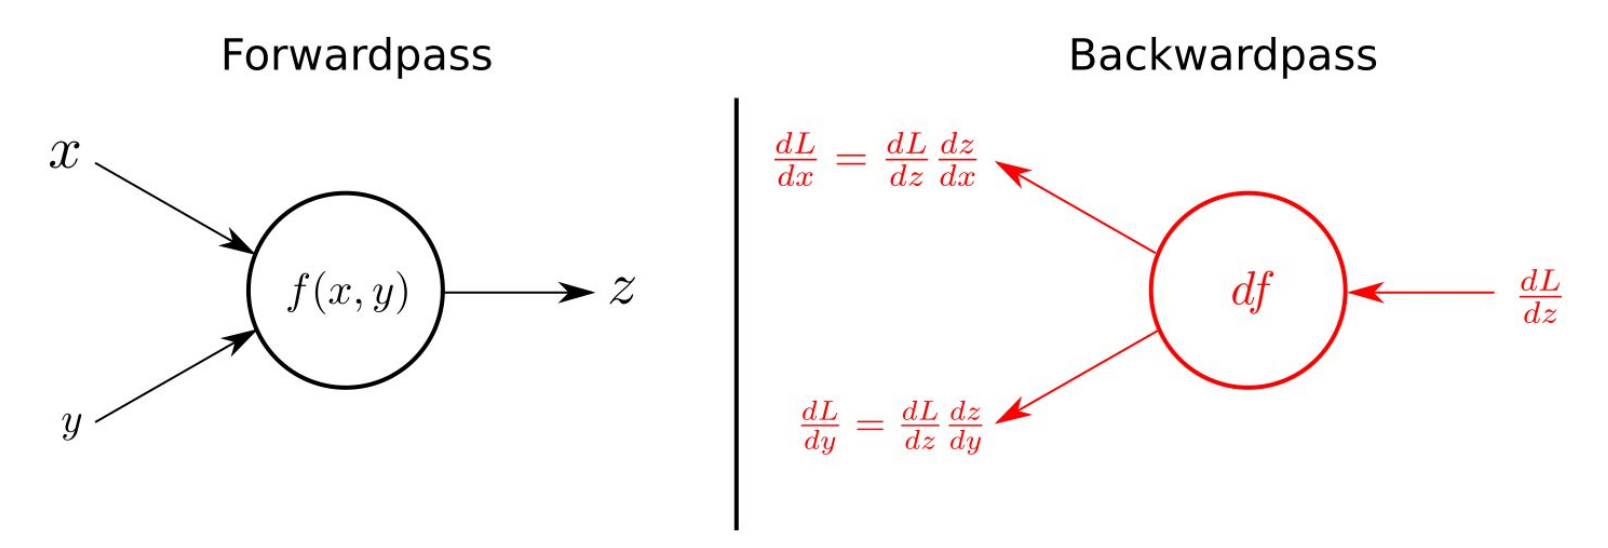


The combination of the loss function and the backward pass gives us an optimization porblem which needs to be solved, for which one generally uses **Stochastic gradient descent** algorithms to find the minimum in a complex loss landscape. Here are some examples of those loss landscapes:

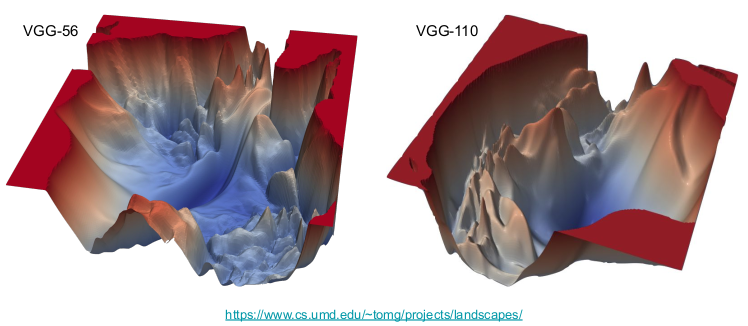

For a deep dive into the algorithmic explanation of the MLP architecture, I would highly suggest Chapter 4 from the book "Machine Learning: An Algorithmic Perspective" by Stephen Marsland.

As an introductory example using the pytroch framework in Python, I will use the classical "Boston Dataset" example,which contains data on the housing prices in the Boston area.
The first cell contains the imports of the packages, the loading of the dataset and a function that puts the data into the right form to be "digestable" for our MLP model.
This includes reshaping the data to torch.tensors, the data structure that is used in the PTorch framework (similar to arrays) and the nortmalizing of the data.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

class BostonDataset(torch.utils.data.Dataset):
  '''
  Prepare the Boston dataset for regression
  '''

  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]


Now lets move on to build the model:

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(13, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
mlp = MLP()

print(mlp)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


The defined model contains an input layer of size 13 (coincides with the length of the data instances), to a hidden layer of size 64, a second hidden layer of size 32 to a fully connected layer of size one as output, the prediction of the house price.

As activation fuicntion ,we choose the ReLU function, which returns the value of the input function if it is positive, or 0 if it would be negative.

Now let's initiate the learning  of the model:

THis includes:

- Selection of the loss function

- Selection of optimizer

- Selection of batch size & number of epochs

In [ ]:
if __name__ == '__main__':
  
  # Set fixed random number seed
  torch.manual_seed(42)
  
  # Load Boston dataset
  X, y = load_boston(return_X_y=True)
  
  # Prepare Boston dataset
  dataset = BostonDataset(X, y)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  
  # Initialize the MLP
  mlp = MLP()
  
  # Define the loss function and optimizer
  loss_function = nn.L1Loss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
  
  # Run the training loop
  for epoch in range(0, 20): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 10 == 0:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

Starting epoch 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Loss after mini-batch     1: 0.043
Loss after mini-batch    11: 0.426
Loss after mini-batch    21: 0.442
Loss after mini-batch    31: 0.461
Loss after mini-batch    41: 0.452
Loss after mini-batch    51: 0.472
Starting epoch 2
Loss after mini-batch     1: 0.047
Loss after mini-batch    11: 0.432
Loss after mini-batch    21: 0.450
Loss after mini-batch    31: 0.434
Loss after mini-batch    41: 0.485
Loss after mini-batch    51: 0.434
Starting epoch 3
Loss after mini-batch     1: 0.049
Loss after mini-batch    11: 0.458
Loss after mini-batch    21: 0.435
Loss after mini-batch    31: 0.423
Loss after mini-batch    41: 0.417
Loss after mini-batch    51: 0.480
Starting epoch 4
Loss after mini-batch     1: 0.051
Loss after mini-batch    11: 0.436
Loss after mini-batch    21: 0.417
Loss after mini-batch    31: 0.452
Loss after mini-batch    41: 0.447
Loss after mini-batch    51: 0.438
Starting epoch 5
Loss after mini-batch     1: 0.043
Loss after mini-batch    11: 0.442
Loss after mini-batch 

We can see that our loss decreases after each epoch, meaning that more passes of the training data through the network help in adjusting the weights, so that the model becomes better at predicting the prices depending on the other features present in the dataset. However. we need to be aware of the bias-variance trade-off.

(Great resource to understand dthe bias-variance trade-off https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

Even though the MLP architecture allows already for solving non-linear regression problems very easily, we have not even remotely explored the Neural Network/Deep Learning zoo, as demonstrated by this small infographic:

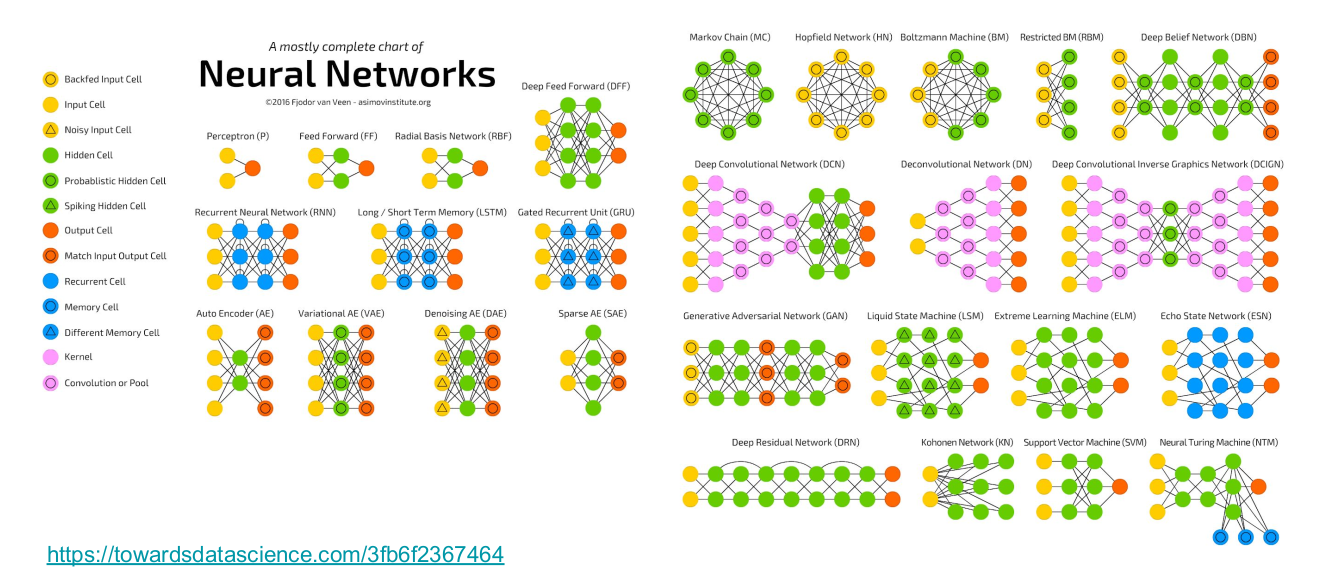

Let's explore some more architectures that are useful for our application:

#### Convolutional Neural Networks & Auto-Encoders (CNNs & AE)

This section requires familiartity with the concept of convolutions of signals.
This image should suffice if one is familiar with the concepts.

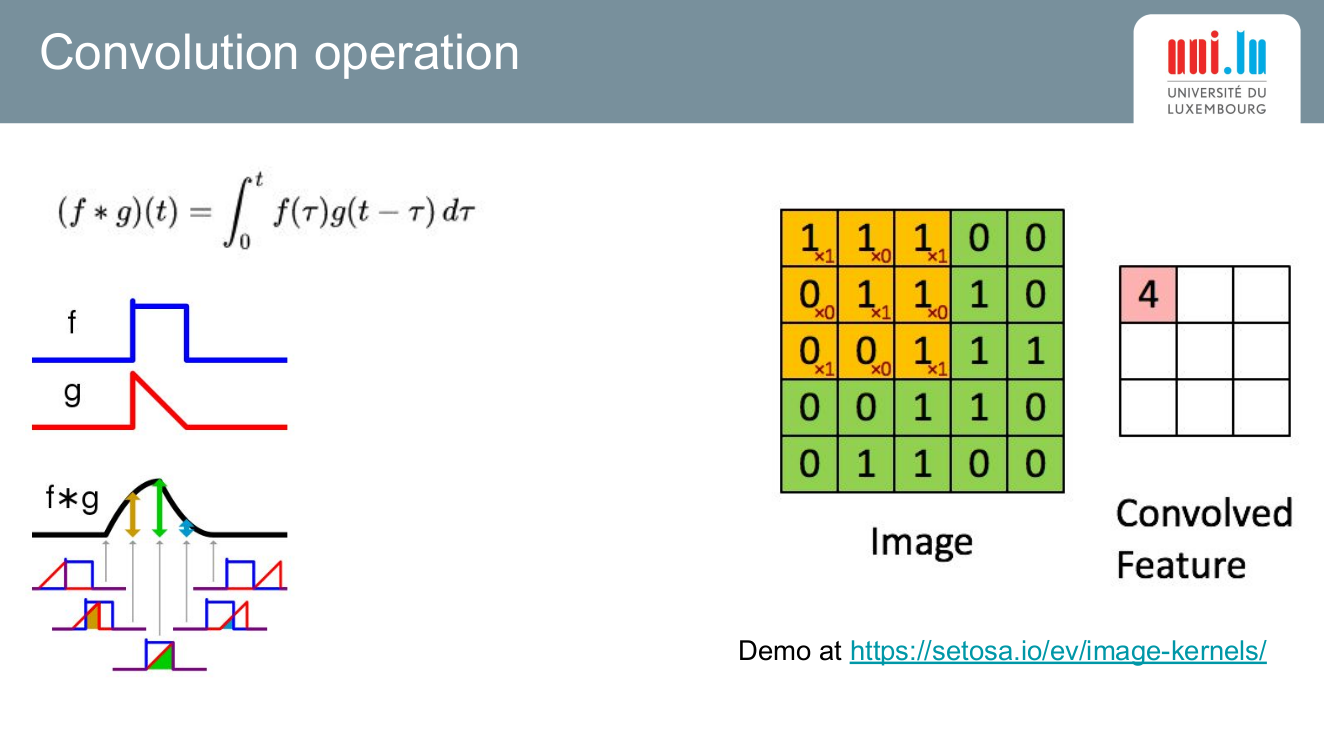



As in classical signal processing, the concept of convolution is easily translated to the domain of image processing. However, in Deep Convolutional Neural Networks, this concept is leveraged in a new and highly effective fashion.

As opposed to have only fully-Connected-Layers (/as in the MLP structure) in our neural netowrk architecture, we use convolutional layers to learn features from a higher dimensional shape (such as an image 2D plus RGB channels for instance f.ex: 256x256 x3) and embed them in a lower dimension (f.ex  without loosing too much information of the inital input data.

Usually, in addition to the convolutional layers, one uses *pooling layers* which help in extracting the most important information from certain parts of an image.

Here would be an example of such an architecture:

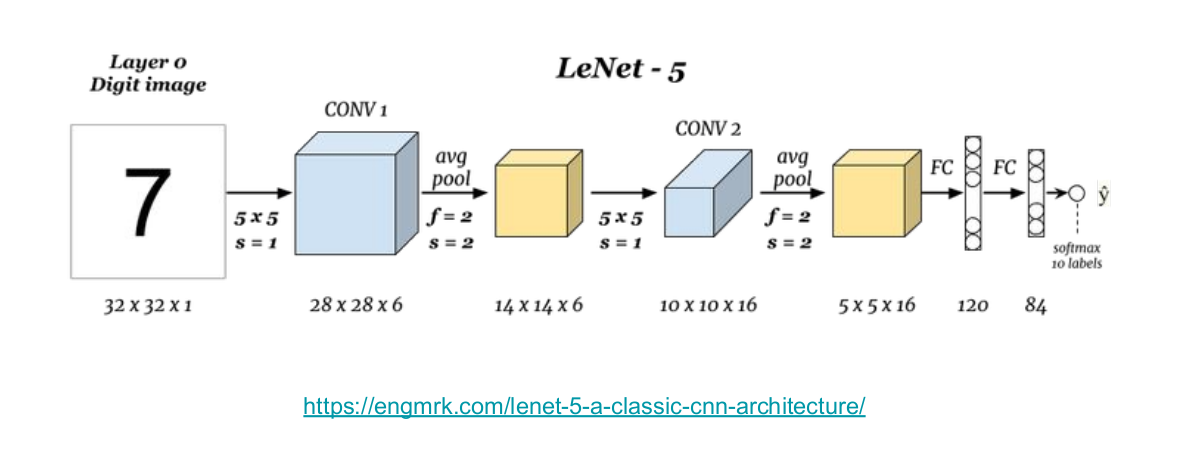


Here is a more precise illustration on how the poolin layers act on the convoluted image data:

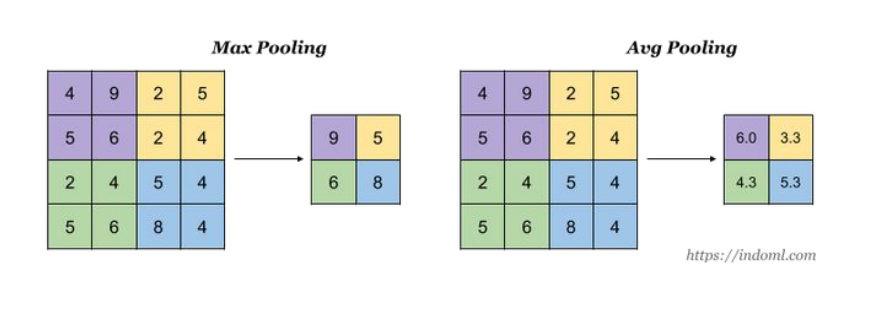

As implementation, I will defer to the wonderful example from my course "Prototyping with Deep Learning" taught by Prof. Luis Leiva and Dr. Bereket Yilma.

The tutorial goes over a simple CNN-image classifier trained on the CIFAR-10 dataset, a dataset containing 600000 32x32 images of 10 different image classes:

- plane
- car
- bird
- cat
- deer
- dog 
- frog
- horse 
- ship
- truck

First, we will download the dataset from the respective website:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean, Standard diviation,  channels

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In the next cell, we will load the data and specify the 10 classes:


Files already downloaded and verified
Files already downloaded and verified


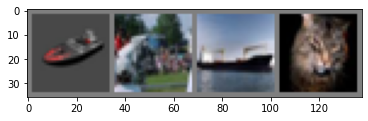

ship  horse ship  cat  


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean, Standard diviation,  channels

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Here we can see a sampole of 4 example images from the dataset.

Let's move on to the design of our model architecture:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2*2 kernel/ window #stride: how many pixels to shift after each operation
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Here we can see a difference between the prior architecture; instead of using only FCs (Linear in the code), we use the Conv2d and the MaxPool2d layers to generalize the features form the image data.
Move on to selecting the loss function, the optimizer and resuming by training the model:

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.214
[1,  4000] loss: 1.857
[1,  6000] loss: 1.656
[1,  8000] loss: 1.567
[1, 10000] loss: 1.496
[1, 12000] loss: 1.458
[2,  2000] loss: 1.392
[2,  4000] loss: 1.334
[2,  6000] loss: 1.346
[2,  8000] loss: 1.314
[2, 10000] loss: 1.274
[2, 12000] loss: 1.286
Finished Training


### Auto-Encoder:

Last but not least, we will treat the final architecture which will be the main pillar of the application in molecular science: the Auto-Encoder.

In this final section of chapter 2, I will go over the concepts of the building blocks of the AE, and how the method differs from the MLP and the CNN.

Here would be a simple illustration of an auto-encoder:

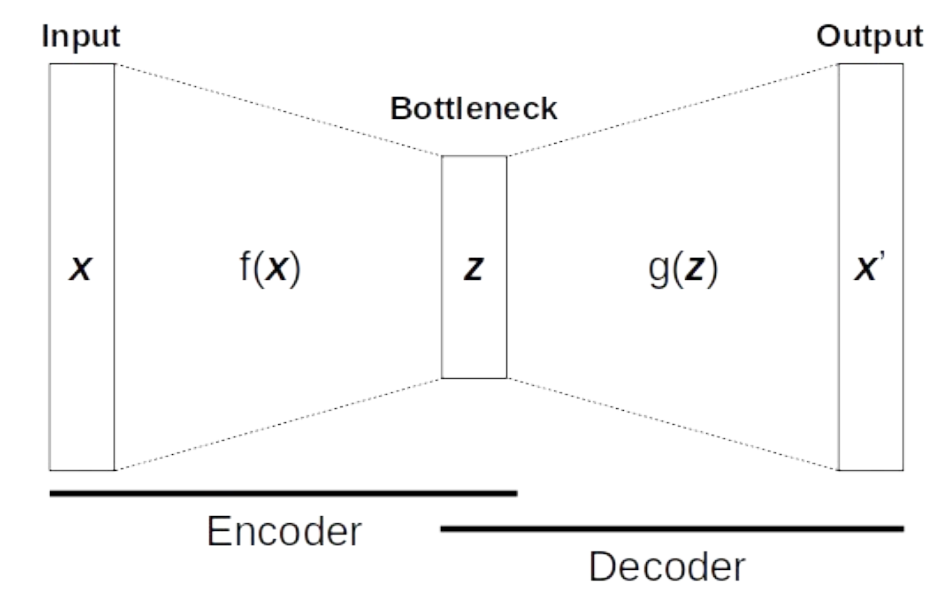

As opposed to the prior architectures, the goal of the Auto-Encoder is a different one:

We have an input dataset $X$, an encoding function $f$, a latent representation $Z$, a decoding function $g$ and a reconstructed version of the original dataset $X'$. The theory, task is simple: Encode the initial dataset to a simple data structure (f. ex: from high dimension to 1D vector) in the bottleneck layer,'through $f$, and correctly reconstruct the intial dataset by means of $g$.

To evaluate the quality of the encoding, one compares the original dataset $X$ and the reconstructed dataset $X'$ by means of siliarity score/loss function such as cross-loss-entropy.

This method allows one to retrieve a very simple data structure to solve complex problems, without loss of the most important information from the data. 



As for a tutorial on auto-encoders, I would highly suggest the examples from https://www.analyticsvidhya.com/blog/2021/06/complete-guide-on-how-to-use-autoencoders-in-python/. The impelmentations are done using KERAS, a very simple and intuitive API for Deep Learning applications.


## Chapter 3: GNN: Theor, Concepts and Applications in molecular science

Graph Neural Networks are a very useful technique resulting of merging neural network theory with graph data.

With the rise of CNNs for image and text data in the years prior to 2016, a counterpart for graph data had yet to be defined. A very successful approach was proposed by Thomas Kipf in 2016, where the idea of CNNs was generalized to structured datasets.

As opposed to the "normal" CNNs, which constitute the network structure themselves, the graph convolutional neural networks (GCN) are build on top of the graph data.
This is beautifully represented in the following illustration provided by Thomas Kipf:

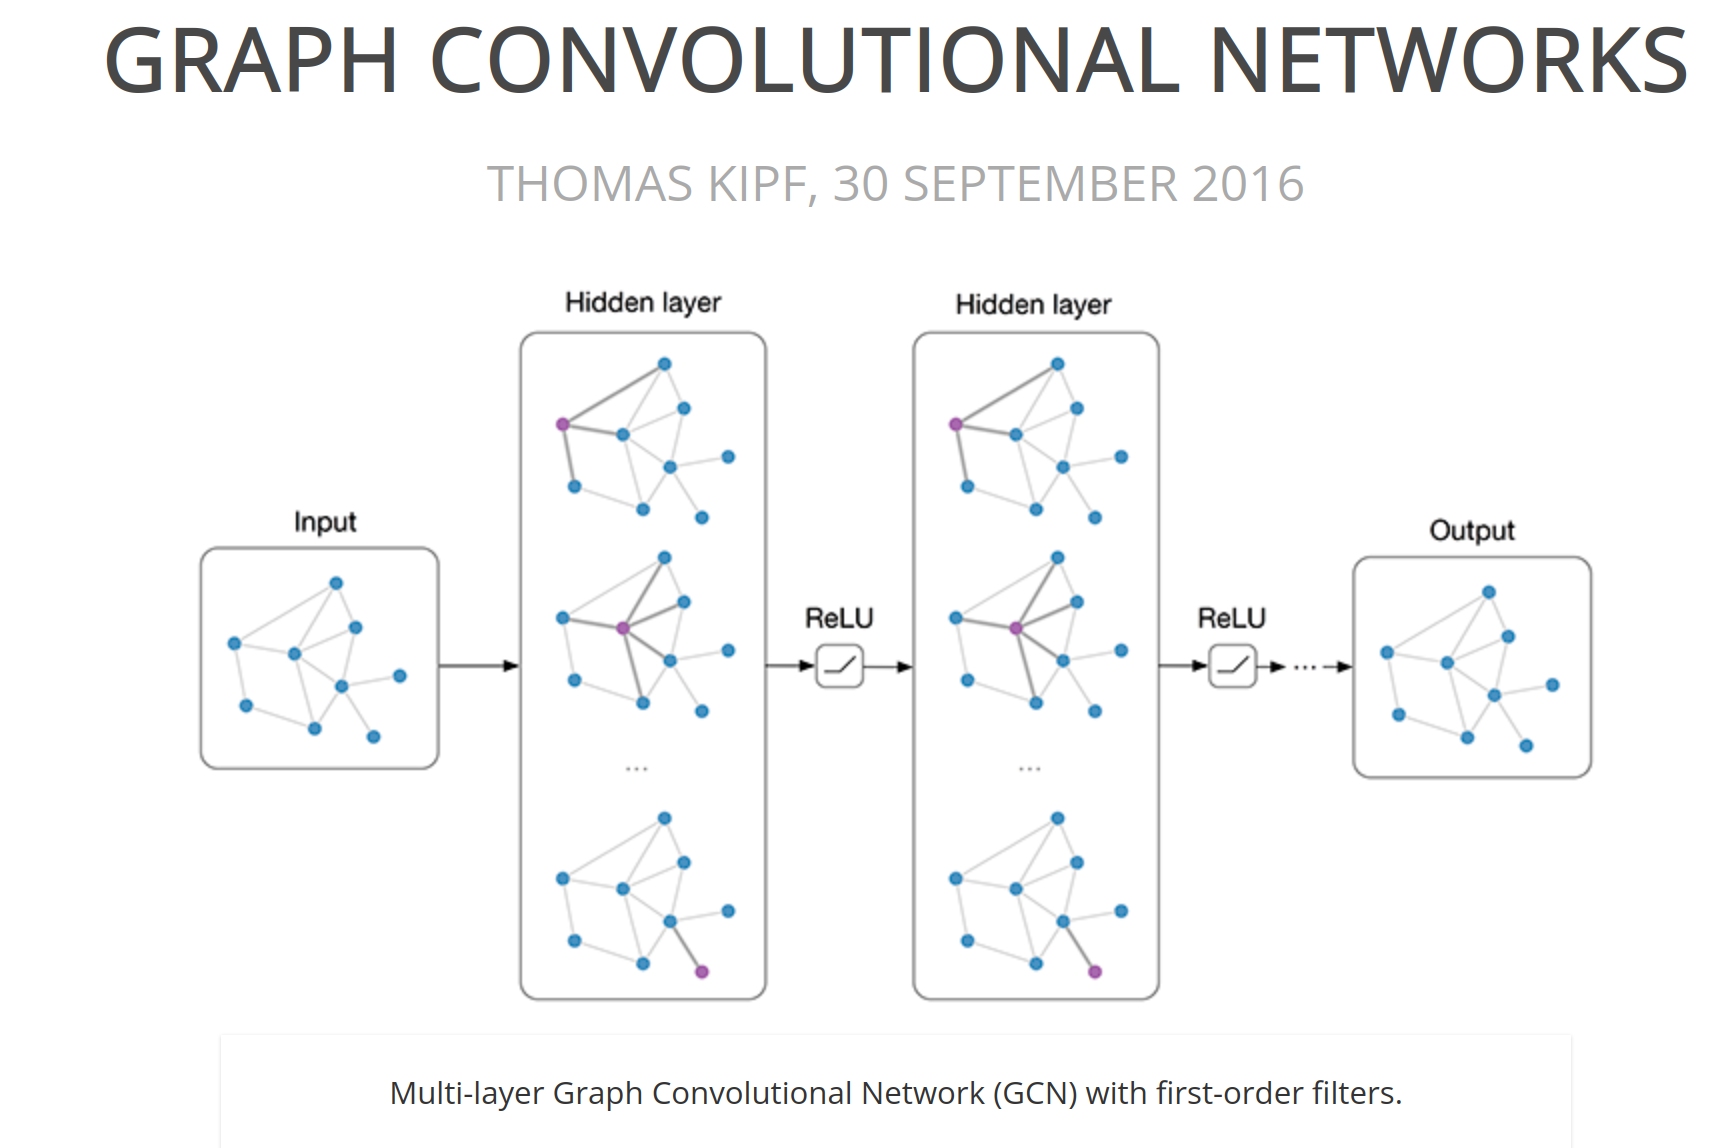


In this case, instead of passing data to different layers, the actions of the neural network are performed "on top" of the graph structure itself.
So instead of "passing" the data to new layer in a different shape, here the informations from a node's $v_i$ neighbouring nodes $v_j$ (for $j \in U$) are "aggregated" on $v_i$ , with $U$  being the neighbourhood-index set. This can also be done for the edges, if there are any features stored in them.
Because this resembles a "passing" of information in the multi-graph structure, it can alsobe referred to as a *Message Passing Neural Network*.

Mathematically, this can be defined in the following manner:

Given a message function $M_t$, a vertex update function $U_t$, hidden states $h^{t}_{v}$ at each vertex $v$ that get updatedby messages $m^{t+1}{v}$, we can define the messages and the hidden states in the follwoing manner:

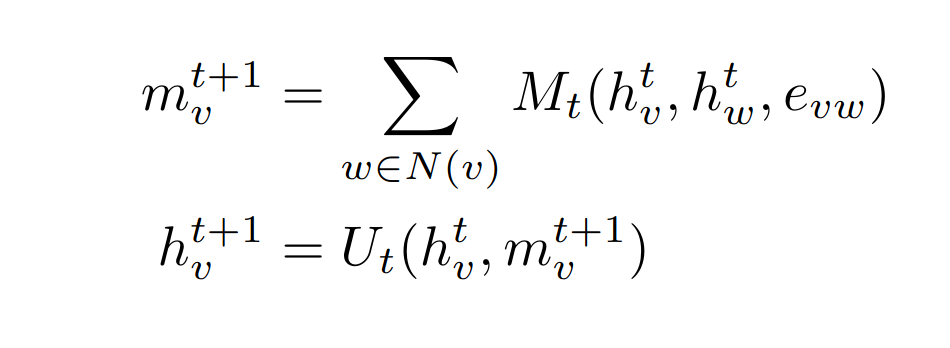



There are three types of problems one can solve on structured graph data:

- Graph-level task:

Prediction of a total graph property

- Node-level task:

Prediction of the role/identity of the distinct nodes on the graph structure

- Edge-level task:

Predicition of property or role of edges in a graph structure

For our application in molecular science, we will first go over an example of a graph level task. More specifically, we want to predict the HOMO-LUMO gap (physical property) of the molecules in the QM9 dataset. This datsset contains moelcular graphs of (small) organic molecules with the elements H-C-N-O-F, with up to 29 atoms per molecule in total.
We will us the **PyTorch Geometric** library to solve this regression task.

(This implementation is provided in the textbook "Machine Learning With PyTorch and Scikit-Learn (Sebastian Raschka, Yuxi (Hayden) Liu etc.)")



Let's install the library:

In [ ]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cpu.html
     |████████████████████████████████| 286 kB 6.6 MB/s 
     |████████████████████████████████| 641 kB 10.1 MB/s 
     |████████████████████████████████| 311 kB 7.4 MB/s 
     |████████████████████████████████| 121 kB 20.0 MB/s 
     |████████████████████████████████| 467 kB 31.8 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=681c1fa9956fb40397005914b0956f38cf5e92dc86b0ba57d11b91032a07347c
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


The first cell imports the needed libraries, loads the dataset and displays how the molecular graphs are provided in the pytorch-geometric framework.

In [ ]:
import torch
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric.nn import NNConv,GCNConv, global_add_pool
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
# let's load the QM9 small molecule dataset
dset = QM9('.')
len(dset)
# Here's how torch geometric wraps data
data = dset[0]
data

# can access attributes directly
data.z

# the atomic number of each atom can add attributes
# data.new_attribute = torch.tensor([1, 2, 3])
# data

# can move all attributes between devices
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#data.to(device)
#data.new_attribute.is_cuda

#print sturcture

print(dset[0])
print(dset[0].x)
print(dset[0].edge_index)
print("")
print(dset[19].edge_attr)
print(dset[0].y)
print(dset[0].pos)

print(dset[0].edge_index)


#train and test split

torch.manual_seed(12345)
dset.shuffle()

print(len(dset))
train_set = dset[0:120000]

test_set = dset[120000:130831]

print(f'Number of training graphs: {len(train_set)}')
print(f'Number of test graphs: {len(test_set)}')

Extracting ./raw/qm9_v3.zip
Processing...
Using a pre-processed version of the dataset. Please install 'rdkit' to alternatively process the raw data.


Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], idx=[1], name='gdb_1', z=[5])
tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]])

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])
tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17

Done!


The next cell covers the design of our model.
Here we will use message passing layers NNConv to learn the features from the molecular graph vertices and edges. Per vertex, there are 11 vertex features that descibe physical properties of the atom in the molecule. We are also provided 4 edge features, which describe the type of bond that exists between the atoms in the molecule.

By aggregating these informations, the task will be to learn to predict the HOMO-LUMO gap of the molecules. This quantity can
for instance describe stability and strength of a compound, or give information about a substance colour in solution.

We start by definitng our model.
As we can see in **ExampleNet()**, we have to define the architecture of **conv1_net** and **conv2_net** which will be applied in the NNConv (Message Passing) layers. As we are again working on a regression task, the ReLU activation function is used as activation function.

Below the model definition, we split the data into train and validation to evaluate how well we ar eable to predict our target. As loss function and optimizer we select MSE (Mean-Square Error) and Adam-optimizer, as usually used in regression tasks.

Let's train the model:

In [ ]:
class ExampleNet(torch.nn.Module):
  def __init__(self, num_node_features, num_edge_features):
    super().__init__()
    conv1_net = nn.Sequential(
        nn.Linear(num_edge_features, 32),
        nn.ReLU(),
        nn.Linear(32, num_node_features*32))

    conv2_net = nn.Sequential(
        nn.Linear(num_edge_features, 32),
        nn.ReLU(),
        nn.Linear(32, 32*16))

    self.conv1 = NNConv(num_node_features, 32, conv1_net)
    self.conv2 = NNConv(32,16, conv2_net)
    self.fc_1 = nn.Linear(16, 32)
    self.out = nn.Linear(32, 1)

  def forward(self, data):
    batch, x, edge_index, edge_attr = (
    data.batch, data.x, data.edge_index, data.edge_attr)
# First graph conv layer
    x = F.relu(self.conv1(x, edge_index, edge_attr))
# Second graph conv layer
    x = F.relu(self.conv2(x, edge_index, edge_attr))
    x = global_add_pool(x,batch)
    x = F.relu(self.fc_1(x))
    output = self.out(x)
    return output

from torch.utils.data import random_split

train_set, valid_set, test_set = random_split(dset,[110000, 10831, 10000])
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)
validloader = DataLoader(valid_set, batch_size=32, shuffle=True)
testloader = DataLoader(test_set, batch_size=32, shuffle=True)


qm9_node_feats, qm9_edge_feats = 11, 4
net = ExampleNet(qm9_node_feats, qm9_edge_feats)
# initialize an optimizer with some reasonable parameters
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
epochs = 100
target_idx = 4 # index position of the energy gap
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)


for total_epochs in range(epochs):
  epoch_loss = 0
  total_graphs = 0 
  net.train()
  for batch in trainloader:
    batch.to(device)
    optimizer.zero_grad()
    output = net(batch)
    loss = F.mse_loss(
      output,batch.y[:, target_idx].unsqueeze(1))
    loss.backward()
    epoch_loss += loss.item()
    total_graphs += batch.num_graphs
    optimizer.step()
  train_avg_loss = epoch_loss / total_graphs
  val_loss = 0
  total_graphs = 0
  net.eval()
  for batch in validloader:
    batch.to(device)
    output = net(batch)
    loss = F.mse_loss(
      output,batch.y[:, target_idx].unsqueeze(1))
    val_loss += loss.item()
    total_graphs += batch.num_graphs
  val_avg_loss = val_loss / total_graphs
print(f"Epochs: {total_epochs} | "f"epoch avg. loss: {train_avg_loss:.2f} | "f"validation avg. loss: {val_avg_loss:.2f}")

KeyboardInterrupt: ignored

Now that we trained and validated the model, we can plot our results to check how well we are are able to predict the HOMO-LUMO-gap.

In [ ]:
net.eval()
predictions = []
real = []
for batch in testloader:
  output = net(batch.to(device))
  predictions.append(output.detach().cpu().numpy())
  real.append(
  batch.y[:,target_idx] .detach().cpu().numpy())
real = np.concatenate(real)
predictions = np.concatenate(predictions)

import matplotlib.pyplot as plt
plt.scatter(real[:130000], predictions[:130000])
plt.xlabel('gap')
plt.ylabel('Predicted gap')


In this plot we can see that we have a linear relationship between the predicted gap and the real gap. This means that we are able to learn the right features from the molecular graphs that help us determine the HOMO-LUMO gap.

# Sources

Sources:

- https://distill.pub/2021/gnn-intro/

- Lectures Slides from Igor Poltavsky & Marharyta Aleksandrova for course MADS-13 "Introduction to Machine Learning Methods and Data Mining"
- Deep Learning (Ian J. Goodfellow, Yoshua Bengio and Aaron Courville), MIT Press, 2016.

- https://pytorch-geometric.readthedocs.io/en/latest/index.html

- Machine Learning: An Algorithmic Perspective 2nd Edition (Stephen Marsland)

- Lecture Notes from Luis Leiva from course MADS-16 "Prototyping with Deep Learning"

- https://tkipf.github.io/graph-convolutional-networks/

- https://towardsdatascience.com/introduction-to-message-passing-neural-networks-e670dc103a87

- https://arxiv.org/pdf/1704.01212.pdf

- Machine Learning With PyTorch and Scikit-Learn (Sebastian Raschka, Yuxi (Hayden) Liu etc.)
